# Kaggle Competition

## Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import warnings
import pylab as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import kaggle

## Import data

In [2]:
%cd D:\IRONHACK\labs_projects\Projects\Kaggle-Data-Science-Predictor\data

D:\IRONHACK\labs_projects\Projects\Kaggle-Data-Science-Predictor\data


In [3]:
!kaggle competitions download -c predict-the-salary-for-data-science-jobs

predict-the-salary-for-data-science-jobs.zip: Skipping, found more recently modified local copy (use --force to force download)


El sistema no puede encontrar la ruta especificada.


In [4]:
import shutil
shutil.unpack_archive('predict-the-salary-for-data-science-jobs.zip', 'D:\IRONHACK\labs_projects\Projects\Kaggle-Data-Science-Predictor\data\old_data')

In [5]:
%cd ..

D:\IRONHACK\labs_projects\Projects\Kaggle-Data-Science-Predictor


### 1. EDA

- salaries_data.csv

 + se puede borrar columnas, filas, etc
 + entrenar (X/Y)
 + x train / x split

- test.csv

 + NO se borran **FILAS**

In [141]:
salaries= pd.read_csv('data/old_data/salaries_data.csv')

test = pd.read_csv('data/old_data/test.csv')

### Salaries

In [47]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [142]:
salaries.shape

(500, 11)

In [143]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [10]:
salaries.work_year.value_counts()

2022    263
2021    181
2020     56
Name: work_year, dtype: int64

In [11]:
salaries.experience_level.value_counts()

SE    243
MI    172
EN     65
EX     20
Name: experience_level, dtype: int64

In [12]:
salaries.employment_type.value_counts()

FT    484
PT      8
CT      4
FL      4
Name: employment_type, dtype: int64

In [13]:
salaries.salary_currency.value_counts()

USD    329
EUR     78
GBP     38
INR     23
CAD     16
JPY      3
TRY      3
AUD      2
PLN      2
MXN      1
CHF      1
CLP      1
BRL      1
HUF      1
SGD      1
Name: salary_currency, dtype: int64

In [14]:
salaries.remote_ratio.value_counts()      

100    320
0      102
50      78
Name: remote_ratio, dtype: int64

In [15]:
salaries.company_location.value_counts()      

US    296
GB     41
CA     25
DE     23
IN     19
FR     12
ES     12
GR     10
JP      4
NL      4
PT      4
LU      3
AE      3
AT      3
PL      3
PK      3
TR      3
CH      2
AU      2
BR      2
NG      2
SI      2
BE      2
MT      1
IR      1
DZ      1
HU      1
CZ      1
HN      1
RO      1
CL      1
EE      1
UA      1
NZ      1
DK      1
CN      1
KE      1
VN      1
MX      1
IE      1
AS      1
MD      1
SG      1
Name: company_location, dtype: int64

In [16]:
lista_paises = list(reversed(salaries.employee_residence.value_counts().index))
lista_paises

['SG',
 'KE',
 'CH',
 'CL',
 'JE',
 'NZ',
 'UA',
 'BG',
 'HK',
 'EE',
 'CZ',
 'PR',
 'MX',
 'DZ',
 'LU',
 'IR',
 'MD',
 'RS',
 'HU',
 'MT',
 'IE',
 'HN',
 'BO',
 'MY',
 'SI',
 'IT',
 'RU',
 'AU',
 'NG',
 'BE',
 'RO',
 'AE',
 'TR',
 'AT',
 'PL',
 'VN',
 'JP',
 'NL',
 'BR',
 'PT',
 'PK',
 'GR',
 'ES',
 'FR',
 'DE',
 'CA',
 'IN',
 'GB',
 'US']

In [17]:
salaries.company_size.value_counts()

M    273
L    165
S     62
Name: company_size, dtype: int64

In [18]:
salaries.drop_duplicates(keep=False,inplace=True)

In [19]:
nan_cols=salaries.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

+ Se quitan los duplicados
+ No hay nulos

In [140]:
salaries.shape

(500, 11)

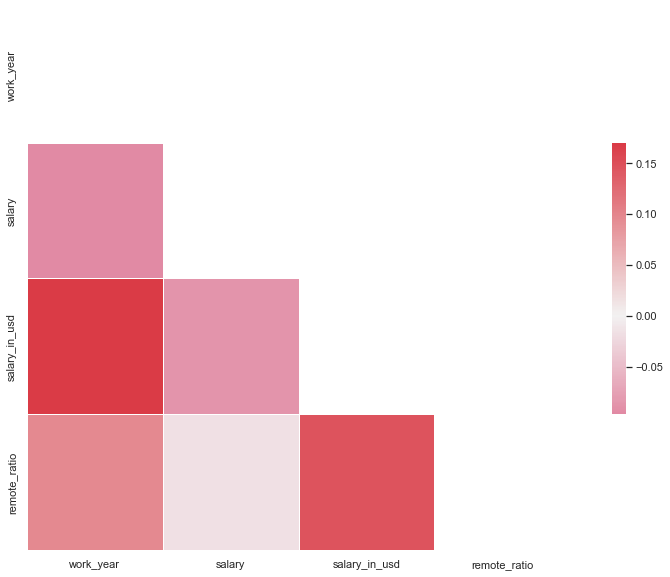

In [144]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

------------------------------------------


### Test Data

In [48]:
test.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [22]:
test.shape

(107, 10)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           107 non-null    int64 
 1   experience_level    107 non-null    object
 2   employment_type     107 non-null    object
 3   job_title           107 non-null    object
 4   salary              107 non-null    int64 
 5   salary_currency     107 non-null    object
 6   employee_residence  107 non-null    object
 7   remote_ratio        107 non-null    int64 
 8   company_location    107 non-null    object
 9   company_size        107 non-null    object
dtypes: int64(3), object(7)
memory usage: 8.5+ KB


In [24]:
nan_cols=test.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [25]:
test.work_year.value_counts()

2022    55
2021    36
2020    16
Name: work_year, dtype: int64

In [26]:
test.experience_level.value_counts()

MI    41
SE    37
EN    23
EX     6
Name: experience_level, dtype: int64

In [27]:
test.drop('salary_currency', inplace=True,axis=1)

In [28]:
test.drop('salary', inplace=True,axis=1)

In [29]:
test.employment_type.value_counts()

FT    104
PT      2
CT      1
Name: employment_type, dtype: int64

In [30]:
test.job_title.value_counts()

Data Scientist                              22
Data Engineer                               21
Data Analyst                                16
Machine Learning Engineer                   10
Research Scientist                           4
Data Architect                               3
Principal Data Engineer                      3
Computer Vision Software Engineer            2
Head of Data Science                         2
Computer Vision Engineer                     2
Data Science Consultant                      2
Data Analytics Engineer                      2
AI Scientist                                 2
Applied Machine Learning Scientist           1
Financial Data Analyst                       1
Business Data Analyst                        1
NLP Engineer                                 1
Principal Data Analyst                       1
Data Science Engineer                        1
Machine Learning Scientist                   1
Machine Learning Developer                   1
Big Data Engi

In [31]:
test.remote_ratio.value_counts()

100    61
0      25
50     21
Name: remote_ratio, dtype: int64

In [32]:
test.company_location.value_counts()

US    59
GB     6
IN     5
DE     5
CA     5
FR     3
JP     2
ES     2
MX     2
DK     2
IT     2
RU     2
CZ     1
PL     1
BR     1
MY     1
GR     1
IQ     1
AT     1
CO     1
IL     1
HR     1
CN     1
AU     1
Name: company_location, dtype: int64

In [33]:
test.company_size.value_counts()

M    53
L    33
S    21
Name: company_size, dtype: int64

In [34]:
test.employee_residence.value_counts()

US    54
GB     6
DE     6
CA     5
IN     5
FR     4
JP     3
RU     2
IT     2
ES     2
DK     2
GR     2
NL     1
AR     1
TN     1
PL     1
BR     1
CO     1
HU     1
SG     1
IQ     1
HR     1
PH     1
MX     1
CN     1
AU     1
Name: employee_residence, dtype: int64

### Diccionarios para data_transformation

In [35]:
def crear_dictios(columna_comparacion):
    lista = list(set(list(salaries[columna_comparacion].unique()) + list(test[columna_comparacion].unique())))
    num_list =[i for i in range(len(lista))]
    return {(lista[i]): (num_list[i]) for i in range(len(lista))}
    

In [49]:
dictio_job_title = crear_dictios('job_title')
dictio_employment_type = crear_dictios('employment_type') #OK
dictio_employee_residence = crear_dictios('employee_residence')
dictio_experience_level = crear_dictios('experience_level') 
dictio_company_size = crear_dictios('company_size') #OK

------------------------------

## Modelo:
- Eliminar columnas 'remote_ratio', 'salary', 'company_location', 'salary_currency', 'work_year'

In [50]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [98]:
test_5_cols= salaries.copy(deep=True)

In [99]:
test_5_cols.drop(['work_year','salary', 'salary_currency','remote_ratio','company_location',], inplace=True,axis=1)

In [100]:
test_5_cols.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_size
0,SE,FT,Data Engineer,140250,US,M
1,SE,FT,Data Engineer,135000,US,M
2,MI,FT,BI Data Analyst,100000,US,M
3,MI,CT,ML Engineer,270000,US,L
4,MI,FT,Data Engineer,26005,RO,L


In [101]:
pred_5_cols = test.copy(deep=True)

In [102]:
pred_5_cols.drop(['work_year','salary', 'salary_currency','remote_ratio','company_location',], inplace=True,axis=1)

In [103]:
pred_5_cols.head()

,experience_level,employment_type,job_title,employee_residence,company_size
0,SE,FT,Machine Learning Scientist,JP,S
1,MI,FT,Lead Data Analyst,US,L
2,MI,FT,Data Analyst,US,L
3,MI,FT,Machine Learning Engineer,CN,M
4,MI,FT,Product Data Analyst,IN,L


In [104]:
pred_5_cols['y'] = -1  #Añadimos y=-1 a la de test

In [105]:
pred_5_cols.shape

(107, 6)

In [106]:
todo_5_cols = pd.concat([pred_5_cols, test_5_cols])

In [107]:
todo_5_cols.head()

,experience_level,employment_type,job_title,employee_residence,company_size,y,salary_in_usd
0,SE,FT,Machine Learning Scientist,JP,S,-1.0,NaN
1,MI,FT,Lead Data Analyst,US,L,-1.0,NaN
2,MI,FT,Data Analyst,US,L,-1.0,NaN
3,MI,FT,Machine Learning Engineer,CN,M,-1.0,NaN
4,MI,FT,Product Data Analyst,IN,L,-1.0,NaN


In [108]:
todo_5_cols.shape

(607, 7)

In [109]:
todo_5_cols.to_excel('powerbi.xlsx', engine='openpyxl')

In [111]:
todo_5_cols.job_title=todo_5_cols.job_title.apply(lambda x: dictio_job_title[x])
todo_5_cols.employment_type=todo_5_cols.employment_type.apply(lambda x: dictio_employment_type[x])
todo_5_cols.employee_residence=todo_5_cols.employee_residence.apply(lambda x: dictio_employee_residence[x])
todo_5_cols.experience_level=todo_5_cols.experience_level.apply(lambda x: dictio_experience_level[x])
todo_5_cols.company_size=todo_5_cols.company_size.apply(lambda x: dictio_company_size[x])

In [112]:
todo_5_cols.head()

,experience_level,employment_type,job_title,employee_residence,company_size,y,salary_in_usd
0,2,2,15,5,1,-1.0,NaN
1,0,2,42,25,2,-1.0,NaN
2,0,2,35,25,2,-1.0,NaN
3,0,2,33,15,0,-1.0,NaN
4,0,2,20,3,2,-1.0,NaN


In [113]:
datos_test_ok = todo_5_cols.loc[todo_5_cols['y'] == -1]

In [114]:
datos_test_ok.shape

(107, 7)

In [115]:
datos_test_ok.columns

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_size', 'y', 'salary_in_usd'],
      dtype='object')

In [116]:
datos_salaries_ok = todo_5_cols.loc[todo_5_cols['y'] != -1]

In [117]:
datos_salaries_ok.shape

(500, 7)

In [118]:
datos_salaries_ok.drop('y', axis=1, inplace=True)

In [119]:
datos_test_ok.drop('salary_in_usd', axis=1, inplace=True)

In [120]:
datos_test_ok.drop('y', axis=1, inplace=True)

Definir X, y
-----------------------------------------------
-------------------------------------------------------

In [121]:
y=datos_salaries_ok.salary_in_usd

In [122]:
X= datos_salaries_ok.drop('salary_in_usd',axis=1)

Entrenamiento modelo
-------------------------------------------------------

In [123]:
from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [124]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR

rfr=RFR()
etr=ETR()

In [125]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()

##### Random forest

In [ ]:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

In [126]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [ ]:
y_pred=rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

In [ ]:
# etr
y_pred=etr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

##### GBR, XGBR, CTR, LGBMR

In [127]:
# boosting
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [128]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

49142.23514678718

In [129]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [130]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

53162.9935495679

In [131]:
ctr.fit(X_train, y_train, verbose=0)

In [132]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

50983.60807543205

In [133]:
lgbmr.fit(X_train, y_train)

LGBMRegressor()

In [134]:
y_pred=lgbmr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

48923.419026221985

## Mejor modelo: Light GBM

Entrenar con X, y y luego predecir con Test

In [135]:
lgbmr.fit(X,y)

LGBMRegressor()

In [136]:
y_pred=ctr.predict(datos_test_ok)

In [137]:
df = pd.DataFrame(y_pred, columns = ['salary_in_usd'])

df['id']= [i for i in range(len(df))]

df = df[['id', 'salary_in_usd']]

df.to_csv('data/kaggle_upload/lastone_cols.csv', index=False)

------------------------------------------------

## H20

H20 puede estimar mejor y también podemos ver qué importancia tiene cada variable

In [75]:
import h2o
from h2o.automl import H2OAutoML

In [76]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from D:\Programas\Miniconda3\envs\kaggle\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\IRENEA~1\AppData\Local\Temp\tmp7p8e3kzv
  JVM stdout: C:\Users\IRENEA~1\AppData\Local\Temp\tmp7p8e3kzv\h2o_iaguerri_started_from_python.out
  JVM stderr: C:\Users\IRENEA~1\AppData\Local\Temp\tmp7p8e3kzv\h2o_iaguerri_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_iaguerri_qu1pt3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.533 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [77]:
h2train=h2o.H2OFrame(datos_salaries_ok)
h2test=h2o.H2OFrame(datos_test_ok)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [78]:
h2train.columns

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_size',
 'salary_in_usd']

In [79]:
X=[c for c in h2train.columns if c!='salary_in_usd']

y='salary_in_usd'

In [80]:
automl=H2OAutoML(max_models=50,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')

In [81]:
# entrena
automl.train(x=X,
             y=y,
             training_frame=h2train)

AutoML progress: |
02:05:25.864: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220720_20525_model_11


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,10604.0,4.0,10.0,6.525,9.0,22.0,16.45




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1796929566.0990767
RMSE: 42390.206016237724
MAE: 28482.3257578125
RMSLE: 0.45392583252133156
Mean Residual Deviance: 1796929566.0990767

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2371723840.77729
RMSE: 48700.347440005906
MAE: 33183.20920026915
RMSLE: 0.5362472154556555
Mean Residual Deviance: 2371723840.77729

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,3.331041e+04,2.079206e+03,3.578546e+04,3.099880e+04,3.133612e+04,3.383802e+04,3.459367e+04
1,mean_residual_deviance,2.395348e+09,6.905419e+08,3.193801e+09,1.628626e+09,1.730742e+09,2.570303e+09,2.853269e+09
2,mse,2.395348e+09,6.905419e+08,3.193801e+09,1.628626e+09,1.730742e+09,2.570303e+09,2.853269e+09
3,r2,5.031195e-01,6.959842e-02,4.428318e-01,6.128739e-01,4.639584e-01,5.304356e-01,4.654981e-01
4,residual_deviance,2.395348e+09,6.905419e+08,3.193801e+09,1.628626e+09,1.730742e+09,2.570303e+09,2.853269e+09
5,rmse,4.851726e+04,7.195796e+03,5.651373e+04,4.035624e+04,4.160219e+04,5.069816e+04,5.341600e+04
6,rmsle,5.298170e-01,5.868105e-02,4.417152e-01,6.028529e-01,5.380841e-01,5.160957e-01,5.503370e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-07-20 02:05:31,2.239 sec,0.0,69544.102008,52000.597920,4.836382e+09
1,,2022-07-20 02:05:31,2.239 sec,5.0,57819.753955,40964.534109,3.343124e+09
2,,2022-07-20 02:05:31,2.254 sec,10.0,51566.965490,35389.128172,2.659152e+09
3,,2022-07-20 02:05:31,2.254 sec,15.0,47816.082097,32524.076211,2.286378e+09
4,,2022-07-20 02:05:31,2.275 sec,20.0,45835.239538,31029.320215,2.100869e+09
5,,2022-07-20 02:05:31,2.275 sec,25.0,44741.993205,30059.967883,2.001846e+09
6,,2022-07-20 02:05:31,2.290 sec,30.0,43604.513368,29388.378287,1.901354e+09
7,,2022-07-20 02:05:31,2.299 sec,35.0,42917.247267,28932.977955,1.841890e+09
8,,2022-07-20 02:05:31,2.308 sec,40.0,42390.206016,28482.325758,1.796930e+09



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,employee_residence,2.976182e+12,1.000000,0.421335
1,experience_level,2.108389e+12,0.708421,0.298483
2,job_title,1.662519e+12,0.558608,0.235361
3,company_size,3.166044e+11,0.106379,0.044821
4,employment_type,0.000000e+00,0.000000,0.000000


#### Mejor modelo GBM - Gradient Boosting

In [82]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20220720_20525_model_11,48700.3,2.37172e+09,33183.2,0.536247,2.37172e+09
GBM_grid_1_AutoML_1_20220720_20525_model_9,48820.3,2.38342e+09,33185.7,0.53727,2.38342e+09
GBM_grid_1_AutoML_1_20220720_20525_model_2,48846.1,2.38594e+09,33105.2,0.530191,2.38594e+09
GBM_2_AutoML_1_20220720_20525,49003.1,2.4013e+09,33433.4,0.538858,2.4013e+09
GBM_grid_1_AutoML_1_20220720_20525_model_15,49177.6,2.41844e+09,33456,0.53137,2.41844e+09
GBM_3_AutoML_1_20220720_20525,49232.8,2.42387e+09,33318.3,0.527512,2.42387e+09
GBM_5_AutoML_1_20220720_20525,49247.8,2.42534e+09,33408.1,0.559639,2.42534e+09
GBM_4_AutoML_1_20220720_20525,49320,2.43246e+09,33430.2,0.539192,2.43246e+09
GBM_grid_1_AutoML_1_20220720_20525_model_4,49468.3,2.44711e+09,33545.7,0.551972,2.44711e+09
GBM_grid_1_AutoML_1_20220720_20525_model_8,49654.8,2.4656e+09,33736.8,0.539459,2.4656e+09


In [84]:
# h2test= h2test.drop('salary_in_usd',axis=1)
h2test.columns

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_size']

In [85]:
y_pred=automl.leader.predict(h2test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [86]:
data_as_df = y_pred.as_data_frame()

In [90]:
data_as_df

,id,salary_in_usd
0,0,84040.989895
1,1,158128.661116
2,2,113634.814871
3,3,68876.041470
4,4,62718.535359
...,...,...
102,102,113105.241938
103,103,180000.800705
104,104,156547.821288
105,105,52624.756186


In [91]:
data_as_df= data_as_df.rename(columns={"predict":"salary_in_usd"})

data_as_df['id']= [i for i in range(len(data_as_df))]

data_as_df = data_as_df[['id', 'salary_in_usd']]

data_as_df.to_csv('data/kaggle_upload/test5_cols_h20.csv', index=False)

In [92]:
data_as_df.head()

,id,salary_in_usd
0,0,84040.989895
1,1,158128.661116
2,2,113634.814871
3,3,68876.041470
4,4,62718.535359
